# 第5回スキルトランスファー: 分析用テーブルをつくる

## pathlibの使い方

In [2]:
import pathlib

In [3]:
pathlib.Path.cwd()

PosixPath('/Users/localadmin/Documents/GitHub/suzuki_analytics/phase_2/notebooks')

In [4]:
path_cwd = pathlib.Path.cwd()

In [5]:
path_cwd.parent.parent.parent.parent.parent

PosixPath('/Users/localadmin')

In [6]:
path_cwd.parents[0]

PosixPath('/Users/localadmin/Documents/GitHub/suzuki_analytics/phase_2')

In [7]:
pathlib.Path.home()

PosixPath('/Users/localadmin')

In [8]:
path_home = pathlib.Path.home()

In [9]:
path_home/"Downloads"

PosixPath('/Users/localadmin/Downloads')

In [10]:
str.__add__

<slot wrapper '__add__' of 'str' objects>

In [11]:
"str" + "sanada"

'strsanada'

In [12]:
path_tmp = path_home/"Downloads"/"untitledfolder"

In [13]:
path_tmp.exists()

False

In [14]:
path_tmp.is_file()

False

In [15]:
path_tmp.is_dir()

False

In [16]:
path_interim = pathlib.Path("../data/interim/")

In [17]:
path_interim.resolve()

PosixPath('/Users/localadmin/Documents/GitHub/suzuki_analytics/phase_2/data/interim')

In [18]:
import os
os.listdir(path_interim)

['cnt_Dbhaa_W_PROD_MODEL_CD.csv',
 'dbhaa_random_500_000.feather',
 '20190624_dbhaa_random_500_000_sub.feather',
 'cnt_Dbhaa_W_SRC_DIV.csv',
 '20190624_tbhaa_random_500_000_sub.feather',
 'warranty_fcok',
 'failure_ratio_model_parts_monthly.feather',
 'cnt_tbhaa_V_SRC_DIV.csv',
 'cnt_Dbhaa_W_TROUBLE_MP.csv',
 'distinct_cnt___dbhaa.csv',
 'tbhaa_random_500_000.feather',
 '.DS_Store',
 'notnull_cnt_dbhaa.csv',
 'cnt_tbhaa_V_BASE_CD.csv',
 'suzuki_skilltransfer.sqlite3.zip',
 'df_fcok_model_num_monthly.csv',
 'cnt_Dbhaa_W_DIST_COUNTRY_CD.csv',
 'cnt_Dbhaa_W_BASE_CD.csv',
 'cnt_Dbhaa_W_MILEAGE_DIV.csv',
 'cnt_Dbhaa_W_DIST_CD.csv',
 'cnt_tbhaa_V_COLOR.csv',
 'cnt_tbhaa_V_PROD_DIV.csv',
 '.gitkeep',
 'cnt_tbhaa_V_FCOK.csv',
 'cnt_tbhaa_V_DIST_CD.csv',
 'suzuki_skilltransfer.sqlite3.7z',
 'cnt_tbhaa_V_SHIPPING_DATE.csv',
 'df_warranty_model_part_num_monthly.csv',
 'cnt_Dbhaa_W_FAILURE_DATE.csv',
 'dbhaa_all_random_500_000_1only.feather',
 'cnt_tbhaa_V_SALES_MODEL_CD.csv',
 'cnt_Dbhaa_W_OPERAT

## SQLを使用して、集計テーブルを作成

In [19]:
PATH_SQLITE_FOLDER = pathlib.Path("/Users/localadmin/Desktop/")

In [20]:
from sqlalchemy import create_engine

In [21]:
PATH_SQLITE = PATH_SQLITE_FOLDER/"suzuki_skilltransfer.sqlite3"

In [22]:
PATH_SQLITE.as_posix()

'/Users/localadmin/Desktop/suzuki_skilltransfer.sqlite3'

In [23]:
engine = create_engine(f"sqlite:///{PATH_SQLITE.as_posix()}")

In [24]:
import pandas as pd

In [25]:
df_tmp = pd.read_sql("""
    select * from dbhaa limit 5;
""", engine)

In [26]:
df_tmp.head()

,W_KEY,W_BASE_CD,W_PROD_BASE_CD,W_FIELD_CLAIM_DIV,W_PROD_DIV,W_DMEX_DIV,W_PROCESS_MONTH,W_DIST_CD,W_DIST_COUNTRY_CD,W_DIST_ISSUE_NO,...,W_SUBLET_AMT,W_SHIPPING_AMT,W_TOTAL_AMT,W_CFC_COMPANY_CD,W_CFC_RATE,W_CFC_AMT,W_FC_TO_FAILURE,W_SALES_TO_FAILURE,W_SB_NO,W_CRT_TIME_STAMP
0,WRAEJP201702A000001,100100,100100,2,A,1,201702,2505A,AE,00A10709,...,0.0,679.0,4145.0,P58X,0,0.0,107,102,None,17-08-02 18:34:49.631885000
1,WRAEJP201702C000001,100100,100100,2,C,1,201702,2505C,AE,00MB2189,...,0.0,0.0,1358.0,3223,100,1358.0,39,36,None,17-08-02 18:38:14.568529000
2,WRAEJP201702C000002,100100,100100,2,C,1,201702,2505C,AE,00MB2188,...,0.0,0.0,1358.0,3223,100,1358.0,39,36,None,17-08-02 18:38:14.570739000
3,WRAEJP201702C000003,100100,100100,1,C,1,201702,2505C,AE,00MB0864,...,0.0,287.0,5660.0,3962,50,2656.0,20,17,None,17-08-02 18:38:15.016027000
4,WRAEJP201702C000004,100100,100100,1,C,1,201702,2505C,AE,0MB2252A,...,0.0,1171.0,9152.0,3479,50,3674.0,28,23,None,17-08-02 18:38:16.974580000


In [27]:
# W_PROD_MODEL_CDは上3桁
# W_CAUSAL_PART_NOは上5-3桁(9桁)
# W_FAILURE_DATEは月次(一旦。あとで日時)
# W_PROD_BASE_CDは国内(100100)
# W_PROD_DIVは四輪(B)

# dbhaaから毎月の各モデル、各パーツのレコードの件数
# W_PROD_DIV == B
# W_PROD_BASE 100100

df_warranty = pd.read_sql("""
select substr(W_PROD_MODEL_CD, 1, 3) as prod_cd
    ,substr(W_CAUSAL_PART_NO, 1, 9) as part_cd
    ,substr(W_FAILURE_DATE, 1, 6)as month
    ,count(*) as n
from dbhaa
where W_PROD_BASE_CD = '100100'
and W_PROD_DIV = 'B'
group by prod_cd, part_cd, month
""", engine)

In [28]:
df_warranty.head()

,prod_cd,part_cd,month,n
0,None,17521-81P,201711,1
1,None,17540-54L,201712,1
2,None,17670-50G,201712,1
3,None,17700-50Z,201701,1
4,None,17700-50Z,201703,1


### 上位10パーツの件数の時系列推移グラフを表示

In [29]:
# 上位10パーツの件数
part_top = df_warranty.groupby("part_cd")["n"].sum()

In [30]:
part_top.sort_values(ascending = False)[:10]

part_cd
28104-788    35753
95411-82K    28661
95410-82K    20225
17521-50M    18006
84701-70K    11667
84702-70K     9115
55311-81M     8773
84701-82K     7233
95411-72M     6888
85107-VDX     6316
Name: n, dtype: int64

In [31]:
top10_parts = (part_top
               .sort_values(ascending = False)[:10]
               .index)

In [32]:
top10_parts

Index(['28104-788', '95411-82K', '95410-82K', '17521-50M', '84701-70K',
       '84702-70K', '55311-81M', '84701-82K', '95411-72M', '85107-VDX'],
      dtype='object', name='part_cd')

In [33]:
df_warranty.head()

,prod_cd,part_cd,month,n
0,None,17521-81P,201711,1
1,None,17540-54L,201712,1
2,None,17670-50G,201712,1
3,None,17700-50Z,201701,1
4,None,17700-50Z,201703,1


In [34]:
df_warranty["MONTH"] = pd.to_datetime(
    df_warranty.month.astype(str) + "01"
)

In [35]:
%matplotlib inline

In [36]:
import matplotlib.pyplot as plt

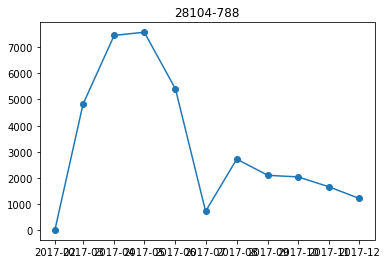

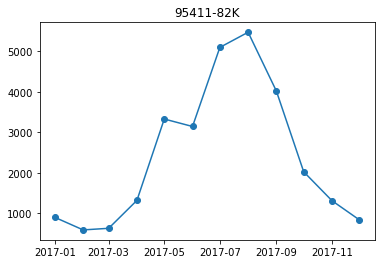

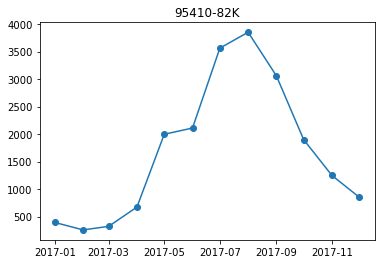

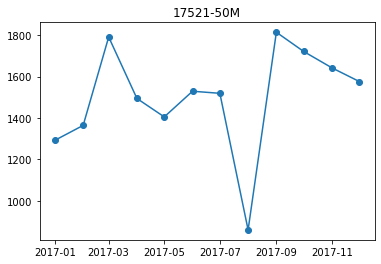

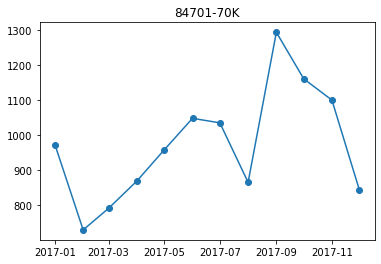

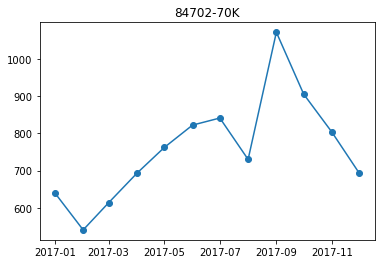

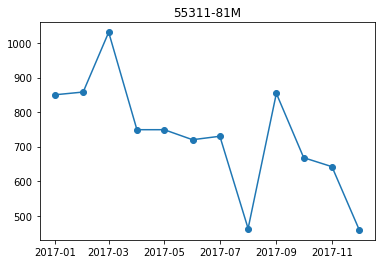

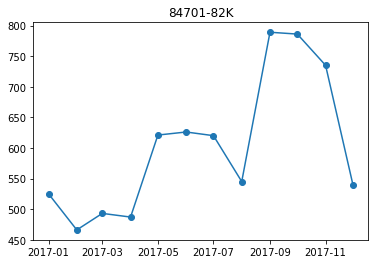

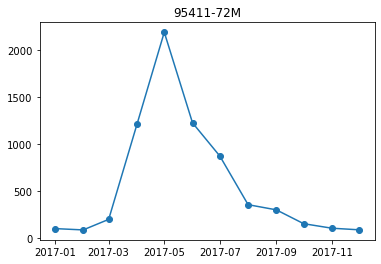

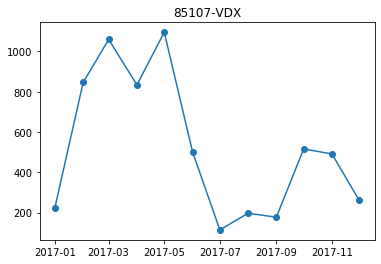

In [42]:
for part in top10_parts:
    
    # df_warrantyはパーツ毎 x 機種毎にわかれて件数が集計されているので、
    # df_warranty.part_cd == partだけだと、複数機種に使用されているパーツについては、同じ月に複数のレコードがでてきてしまう。
    # groupby("MONTH")["n"].apply(sum)で月毎でnをsumすることで、パーツのその月の合計ワランティ件数を計算する。
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby("MONTH")["n"]
           .apply(sum))
    plt.plot(tmp.index, tmp.values, "o-")
    plt.title(part)
    plt.show()
    
# 上位10パーツ毎のプロット

## 宿題

1. fig, add_subplotを使用して一つのグラフでまとめて描画してみてください。(サイズを横15,縦10で、3行4列で表示)
2. パーツ毎ではなく、機種毎でプロットしてみてください。(上位10機種を、3行4列、サイズは横15,縦10で表示)
3. 機種毎のプロットについても、問題2と同様、fig, add_subplotを使用して一つのグラフでまとめて描画してみてください。

### 追加の宿題

- 問題2のグラフについて、set_ylimを使って、y軸の範囲を0から10000にして表示してください。
- 問題2のグラフについて、set_xlimを使って、2017年の上半期だけ表示してください。
- 問題2のグラフについて、マーカーを△に、線を点線に変更してください。
- 問題2のグラフについて、マーカーを消して、線だけに変更してください。
- 問題2のグラフについて、線を消して、四角のマーカーだけに変更してください。
- 問題2のグラフについて、色を赤色に変更してください。
- 問題2のグラフについて、各グラフにパーツ名の凡例を表示してください。
- 問題2のグラフを"parts_warranty_monthly.png"という名前を付けてnotebookのある場所にfiguresというフォルダを作ったうえで、保存してください。
    - ヒント: osやpathlibライブラリを使うと、フォルダを作ることができます。保存先はpathlibライブラリを使ってみましょう)
        - [こちらを参照](https://note.nkmk.me/python-pathlib-mkdir-rmdir/)
- 各機種の月次の生産台数を、tbhaaテーブルからSQLを使って集計, df_fcokという変数に取り込んで下さい。ただし、国内生産のみ、四輪のみに限定してください。
- 国内生産/四輪に絞った場合において、最も多くの機種に採用されているパーツは何で、何種類の機種に採用されていますか？ワランティのデータから計算してみてください。パーツコードは上5-3桁、機種コードは上3桁を使用してください。
- 国内生産/四輪に絞った場合において、ワランティ件数上位10種のパーツのそれぞれにおいて、輸出と輸入の件数を棒グラフにして比較してください。パーツコードは上5-3桁を使用してください。また、そのグラフを上記で作成したfiguresフォルダ内にわかりやすい名前をつけて保存してください。
    - ヒント: for文を回す前に、行がパーツの種類、列が輸入/輸出, 各値がレコード件数のようなテーブルを作ると良いです。groupbyのSQLで縦持ちでテーブルを得たあとに、pivot_tableメソッドで横持ちに変更しましょう